In [27]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import seaborn as sn

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
train_data = torchvision.datasets.CIFAR10(root="data/",download=True, train=True, transform=transform)

100.0%


Extracting data/cifar-10-python.tar.gz to data/


In [15]:
display_data = torchvision.datasets.CIFAR10(root="data/",download=True, train=True)

Files already downloaded and verified


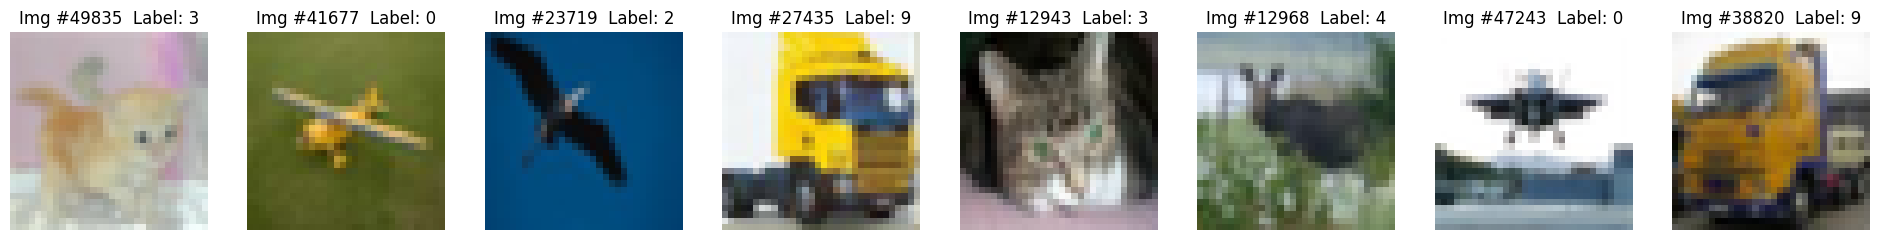

In [17]:
import matplotlib.pyplot as plt

N_IMGS = 8
fig, ax = plt.subplots(1,N_IMGS)
fig.set_size_inches(3 * N_IMGS, 3)

ids = np.random.randint(low=0, high=len(train_data), size=N_IMGS)

for i, n in enumerate(ids):
    img = display_data[n][0]#.numpy().reshape(28,28)
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f"Img #{n}  Label: {display_data[n][1]}")
    ax[i].axis("off")
plt.show()

In [4]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

In [5]:
class CNN_Model(torch.nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=64,kernel_size=3,stride=1,padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3,stride=1,padding=1)
        self.conv3 = torch.nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3,stride=1,padding=1)
        self.pool = torch.nn.MaxPool2d(2,stride=2)
        self.fc1 = torch.nn.Linear(256 * 4 * 4, 128)  # Fully connected layer
        self.fc2 = torch.nn.Linear(128, 10)  # 10 output classes for CIFAR-10
        return
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [6]:
a = iter(trainloader)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
model = CNN_Model().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
for epoch in range(20):  # Training for 10 epochs
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

Epoch 1, Loss: 1.2764
Epoch 2, Loss: 0.8326
Epoch 3, Loss: 0.6620
Epoch 4, Loss: 0.5368
Epoch 5, Loss: 0.4348
Epoch 6, Loss: 0.3415
Epoch 7, Loss: 0.2710
Epoch 8, Loss: 0.2170
Epoch 9, Loss: 0.1848
Epoch 10, Loss: 0.1560
Epoch 11, Loss: 0.1351
Epoch 12, Loss: 0.1314
Epoch 13, Loss: 0.1136
Epoch 14, Loss: 0.1106
Epoch 15, Loss: 0.0993
Epoch 16, Loss: 0.0982
Epoch 17, Loss: 0.0974
Epoch 18, Loss: 0.0871
Epoch 19, Loss: 0.0855
Epoch 20, Loss: 0.0824


In [10]:
test_data = torchvision.datasets.CIFAR10(root="data/",download=True, train=False, transform=transform)

Files already downloaded and verified


In [11]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [26]:
correct = 0
total = 0

true_labels = []
predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 75.45%


In [25]:
test_data[1]

(tensor([[[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
          [ 0.8667,  0.8431,  0.8431,  ...,  0.8510,  0.8510,  0.8431],
          [ 0.8588,  0.8353,  0.8353,  ...,  0.8431,  0.8431,  0.8353],
          ...,
          [-0.3176, -0.6627, -0.8510,  ...,  0.3255,  0.4275,  0.4745],
          [-0.3569, -0.6392, -0.7176,  ...,  0.3647,  0.4510,  0.4667],
          [-0.3333, -0.5137, -0.5451,  ...,  0.3176,  0.4118,  0.4588]],
 
         [[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
          [ 0.8667,  0.8431,  0.8431,  ...,  0.8510,  0.8510,  0.8431],
          [ 0.8588,  0.8353,  0.8353,  ...,  0.8431,  0.8431,  0.8353],
          ...,
          [-0.2235, -0.6000, -0.8196,  ...,  0.4431,  0.5451,  0.5843],
          [-0.2471, -0.5529, -0.6549,  ...,  0.4824,  0.5686,  0.5843],
          [-0.2078, -0.4118, -0.4745,  ...,  0.4353,  0.5294,  0.5686]],
 
         [[ 0.8431,  0.8118,  0.8196,  ...,  0.8275,  0.8275,  0.8196],
          [ 0.8667,  0.8431,

Validation accuracy: 75.45%


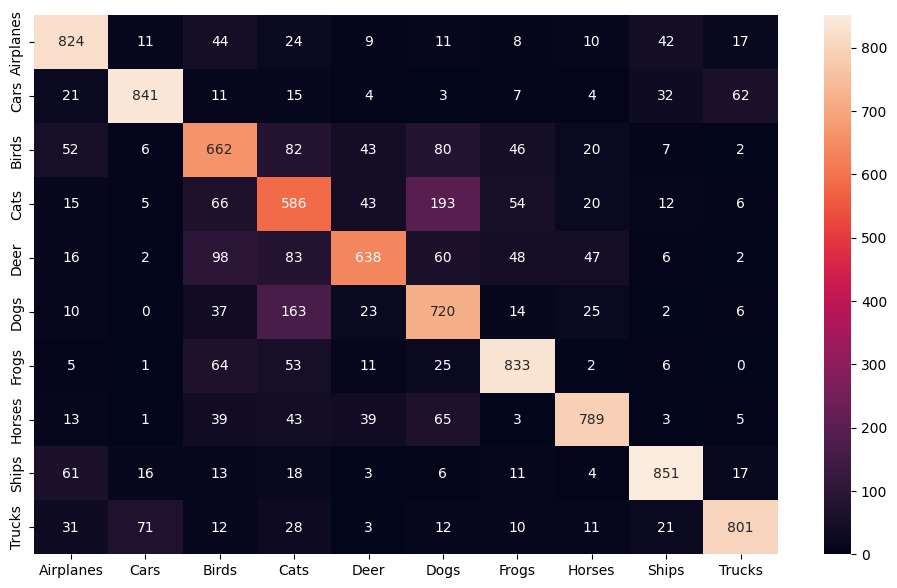

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# constant for classes
classes = ("Airplanes", "Cars", "Birds", "Cats", "Deer", "Dogs", "Frogs", "Horses", "Ships", "Trucks")
accuracy = accuracy_score(true_labels, predictions) * 100
print(f"Validation accuracy: {round(accuracy,2)}%")
cf_matrix = confusion_matrix( true_labels, predictions)
plt.figure(figsize = (12,7))

sn.heatmap(cf_matrix, annot=True,fmt="d",xticklabels=classes, yticklabels=classes)
plt.savefig('output.png')